# Numerical Experiments for "BayesCG as an uncertainty aware version of CG"

This notebook documents how the plots in the paper were produced. 

This notebook depends on the following files being in the same directory:
- plots.py
- utilities.py
- bayescg_k.py
- cgqs.py
- bsstk18_prec.mtx

Run all cells to replicate the plots in the paper. The commands that save the plots are commented out.


In [1]:
from plots import * 
from utilities import *
import numpy as np

from scipy.sparse.linalg import norm as spnorm
from scipy.io import mmread
from time import time


## Numerical Experiments

### Random Matrix

#### Setup

We generate the size $n = 100$ random matrix.

In [2]:
np.random.seed(1)

N = 100

A,SVD_A = random_matrix_generator(N,3,2)
U = SVD_A['U']
S = SVD_A['S']
SqrtInvA = U*(S**(-1/2))
CondA = max(S)/min(S)
NormA = max(S)

def AVec(w):
    return A@w

def InvAVec(w):
    return (U*(S**-1))@(U.T@w)

def IVec(w):
    return w

x0 = np.zeros(N)

##### Right Hand Side (drawn from Inverse Prior)

In [3]:
xTrue = mv_normal(x0,SqrtInvA)
b = AVec(xTrue)

#### Identity Prior With Reorthogonalization

"\nplt.figure(1)\nplt.savefig('../NumericalPaperImages/IdReorth.pdf')\n"

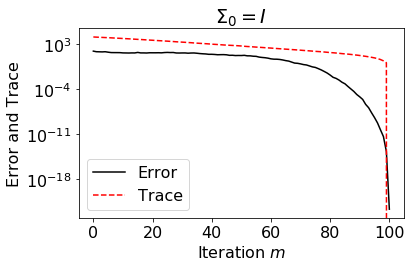

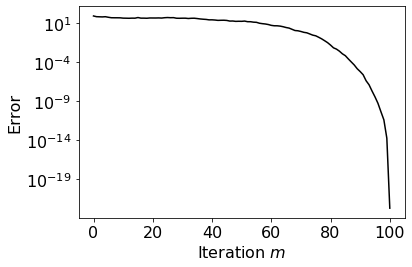

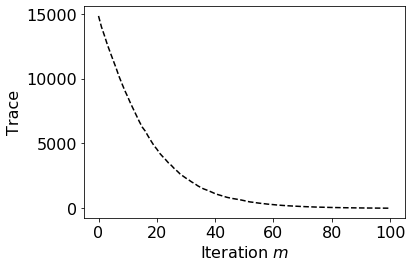

In [4]:
# RUN CELL TWICE TO SET FONT SIZE
plt.rcParams.update({'font.size': 16})

it = N
reorth = True
samples = None

bayescg_convergence(AVec, b, x0, IVec, NormA, xTrue, it, samples=samples, reorth=reorth, plt_title=False)

plt.figure(1)
AxesInvId = plt.axis()

plt.figure(1)
plt.title('$\Sigma_0 = I$')
plt.tight_layout()

'''
plt.figure(1)
plt.savefig('../NumericalPaperImages/IdReorth.pdf')
'''


#### Inverse Prior With Reorthogonalization

"\nplt.figure(1)\nplt.savefig('../NumericalPaperImages/InvReorth.pdf')\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/InvReorthSamples.pdf')\n"

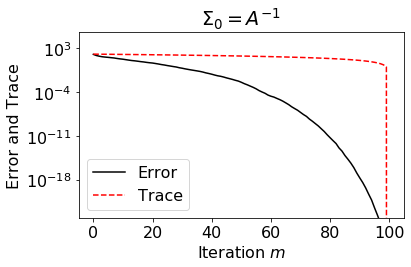

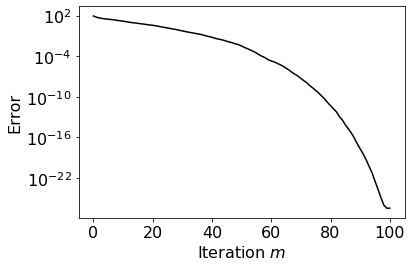

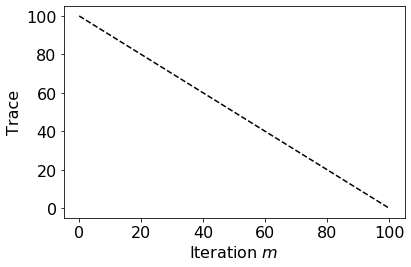

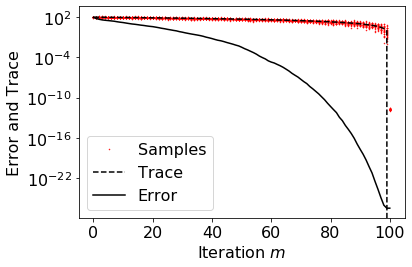

In [5]:
it = N
reorth = True
samples = 25

bayescg_convergence(AVec, b, x0, InvAVec, NormA, xTrue, it, 1, samples=samples, reorth=reorth, plt_title=False)

plt.figure(1)
plt.axis(AxesInvId)
plt.title('$\Sigma_0 = A^{-1}$')
plt.tight_layout()

plt.figure(4)
Axes = plt.axis()

'''
plt.figure(1)
plt.savefig('../NumericalPaperImages/InvReorth.pdf')
plt.figure(4)
plt.savefig('../NumericalPaperImages/InvReorthSamples.pdf')
'''



#### Krylov Prior With Reorthogonalization

Max Krylov dimension. No new search directions


"\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/KrylovReorth.pdf')\n"

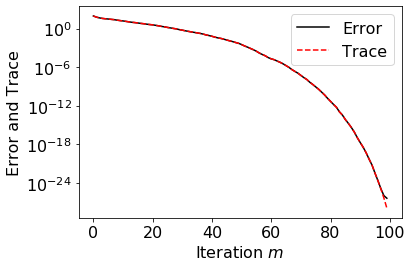

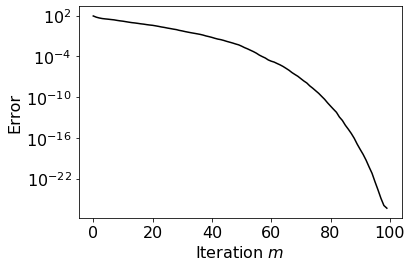

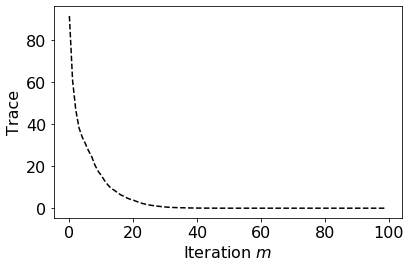

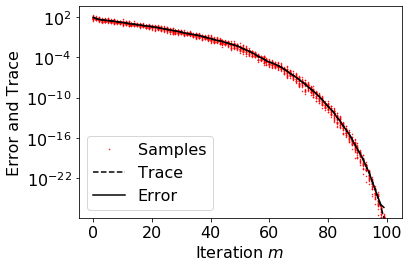

In [6]:
it = N-1
reorth = True
samples = 25

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, N, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)

'''
plt.figure(4)
plt.savefig('../NumericalPaperImages/KrylovReorth.pdf')
'''


#### Inverse Prior Without Reorthogonalization

"\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/InvNoReorthSamples.pdf')\n"

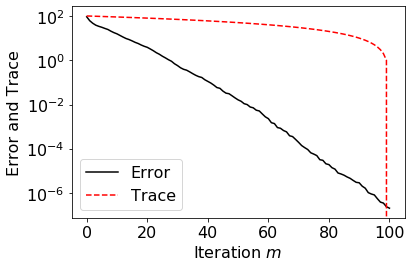

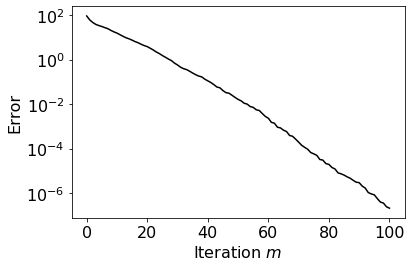

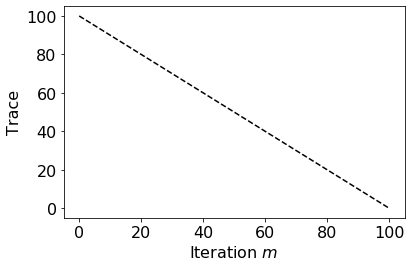

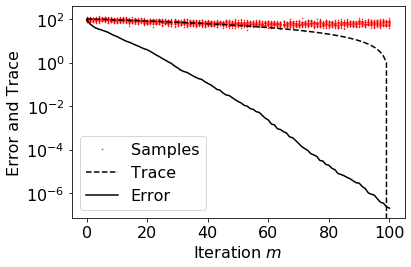

In [7]:
it = N
reorth = False
samples = 25

bayescg_convergence(AVec, b, x0, InvAVec, NormA, xTrue, it, 1, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
Axes = plt.axis()

'''
plt.figure(4)
plt.savefig('../NumericalPaperImages/InvNoReorthSamples.pdf')
'''



#### Krylov Prior Without Reorthogonalization

"\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/KrylovNoReorth.pdf')\n"

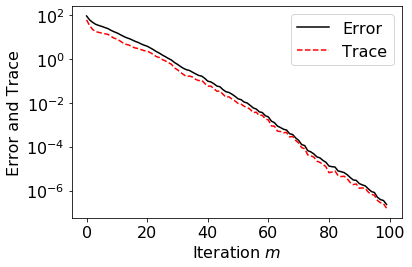

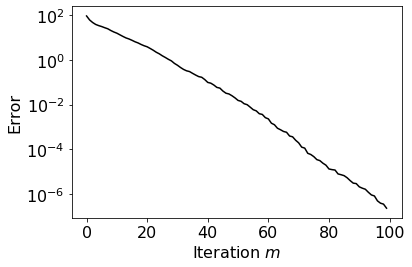

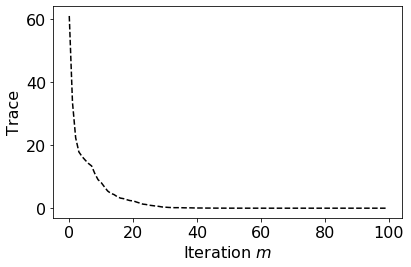

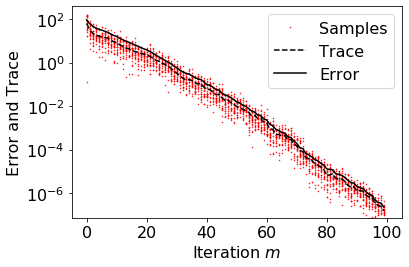

In [8]:
it = N-1
reorth = False
samples = 25

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, 5, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)

'''
plt.figure(4)
plt.savefig('../NumericalPaperImages/KrylovNoReorth.pdf')
'''


### Large Preconditioned Matrix

#### Setup

We setup the size $n = 11948$ linear system.

In [9]:
np.random.seed(1)

A = mmread('bcsstk18_prec.mtx')

N = 11948


def AVec(w):
    return A.dot(w)

NormA = spnorm(A)
GR = None
#GR = 9e-14   # Min eig 9.04987e-14
CondA = NormA/9.04987e-14
print(CondA)

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

1567377.2101676136


"\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/KrylovBig1.pdf')\n"

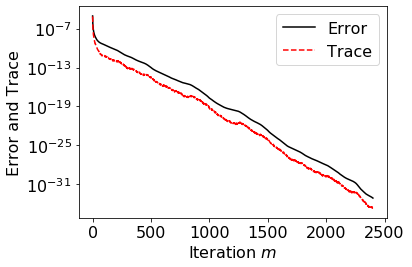

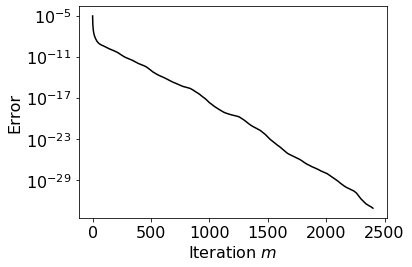

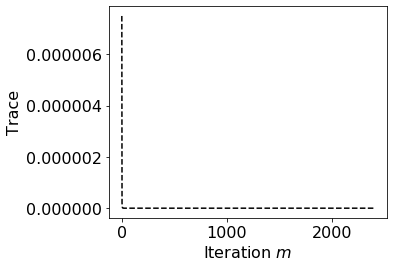

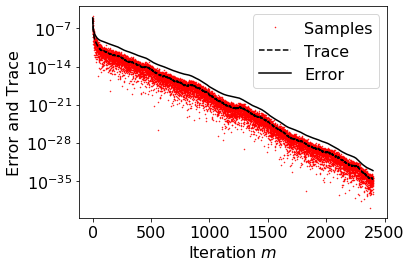

In [10]:
it = 2400
reorth = False
samples = 5
post_rank = 1

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, post_rank, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
Axes = plt.axis()

'''
plt.figure(4)
plt.savefig('../NumericalPaperImages/KrylovBig1.pdf')
'''


"\nplt.figure(4)\nplt.savefig('../NumericalPaperImages/KrylovBig50.pdf')\n"

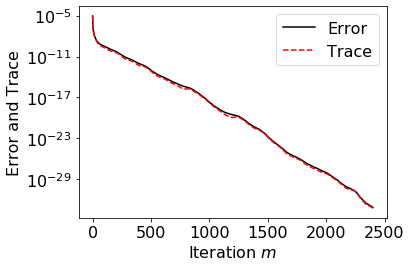

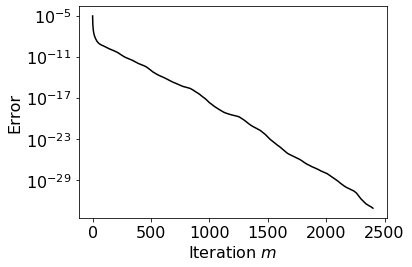

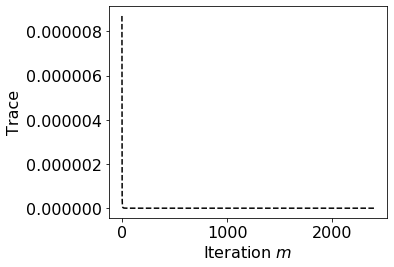

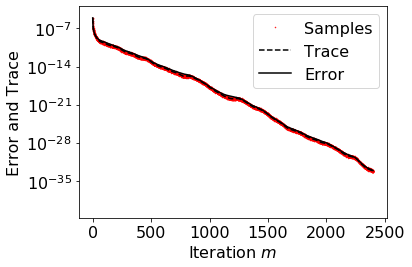

In [11]:
it = 2400
reorth = False
samples = 5
post_rank = 50

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, post_rank, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)

'''
plt.figure(4)
plt.savefig('../NumericalPaperImages/KrylovBig50.pdf')
'''
